In [ ]:
!pip install -U scikit-learn

# Part I) Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part II) Import Dataset

In [ ]:
dataset = pd.read_csv('avocado.csv')
dataset = dataset.iloc[:, 1:]
dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Part III) Feature modify

* Note:

    spring (Mar to May)
    
    summer (July to Aug)
    
    fall (Sep to Nov)
    
    winter (Dec to Feb)

In [ ]:
def convert_month(month):
    if month == 3 or month == 4 or month == 5:
        return 0
    elif month == 6 or month == 7 or month == 8:
        return 1
    elif month == 9 or month == 10 or month == 11:
        return 2
    elif month == 12 or month == 1 or month == 2:
        return 3

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset['Month'] = pd.DatetimeIndex(dataset['Date']).month

In [ ]:
dataset['Season'] = dataset['Month'].apply(lambda x: convert_month(x))

In [ ]:
dataset

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,3
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,3
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,3
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,3
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,3
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,3
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,3
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,3


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

# Part III) Encoding Dataset

In [ ]:
df_type = pd.get_dummies(dataset["type"])
df_type

,conventional,organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
18244,0,1
18245,0,1
18246,0,1
18247,0,1


In [ ]:
#df_type.dtypes

In [ ]:
#df_type = df_type.astype(float)
#df_type.dtypes

In [ ]:
df_region = pd.get_dummies(dataset["region"])
df_region

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#df_region.dtypes

In [ ]:
#df_region = df_region.astype(float)
#df_region.dtypes

In [ ]:
dataset.drop(['type', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags'], axis=1, inplace=True)
dataset.drop('region', axis=1, inplace=True)

In [ ]:
dataset = pd.concat([dataset, df_type, df_region], axis="columns")
dataset.head(20)

,Date,AveragePrice,Total Volume,Total Bags,year,Month,Season,conventional,organic,Albany,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,2015-12-27,1.33,64236.62,8696.87,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,9505.56,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,8145.35,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,5811.16,2015,12,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,6183.95,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2015-11-22,1.26,55979.78,6683.91,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2015-11-15,0.99,83453.76,8318.86,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2015-11-08,0.98,109428.33,6829.22,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,2015-11-01,1.02,99811.42,11388.36,2015,11,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2015-10-25,1.07,74338.76,8625.92,2015,10,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 18249 non-null  datetime64[ns]
 1   AveragePrice         18249 non-null  float64       
 2   Total Volume         18249 non-null  float64       
 3   Total Bags           18249 non-null  float64       
 4   year                 18249 non-null  int64         
 5   Month                18249 non-null  int64         
 6   Season               18249 non-null  int64         
 7   conventional         18249 non-null  uint8         
 8   organic              18249 non-null  uint8         
 9   Albany               18249 non-null  uint8         
 10  Atlanta              18249 non-null  uint8         
 11  BaltimoreWashington  18249 non-null  uint8         
 12  Boise                18249 non-null  uint8         
 13  Boston               18249 non-

# Part IV) Create Independent and Dependent Variable

In [ ]:
X = dataset.iloc[:, 2:].values
X

array([[6.4236620e+04, 8.6968700e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.4876980e+04, 9.5055600e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1822022e+05, 8.1453500e+03, 2.0150000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3766760e+04, 9.3941100e+03, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6205220e+04, 1.0969540e+04, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.7489580e+04, 1.2014150e+04, 2.0180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [ ]:
y = dataset.iloc[:, 1].values
y

array([1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Part V) Feature Scaling

C:\ProgramData\Anaconda3\envs\venai_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


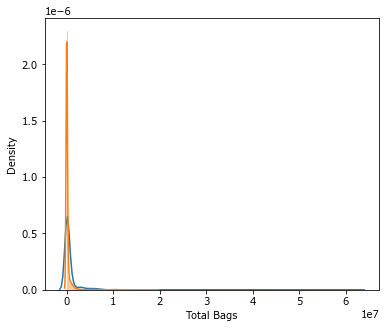

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
sns.kdeplot(dataset['Total Volume'], ax=ax)

sns.distplot(dataset['Total Bags'], ax=ax)

plt.show()

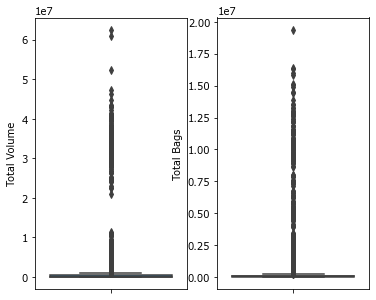

In [ ]:
plt.figure(figsize=(6,5))
plt.subplot(1,2,1)
sns.boxplot(y=dataset['Total Volume'])
plt.subplot(1,2,2)
sns.boxplot(y=dataset['Total Bags'])

plt.show()

In [ ]:
dataset['Total Volume'].skew(), dataset['Total Bags'].skew()

(9.00768747885452, 9.756071670300289)

In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.257056,-0.370103,0.5,1.000000,0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.591911,0.982727,0.5,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.231142,-0.372801,-0.5,0.166667,-0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.035859,0.247554,-0.5,0.166667,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.240954,-0.355723,1.0,-0.500000,-0.666667,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,-0.243236,-0.363818,-0.5,-0.666667,0.333333,-1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14595,-0.070667,0.091445,0.0,-0.666667,0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14596,-0.244393,-0.373158,-0.5,-0.500000,-0.666667,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14597,-0.253624,-0.372318,-0.5,0.666667,0.000000,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaled_df = pd.DataFrame(X_train)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.257056,-0.370103,0.5,1.000000,0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.591911,0.982727,0.5,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.231142,-0.372801,-0.5,0.166667,-0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.035859,0.247554,-0.5,0.166667,-0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.240954,-0.355723,1.0,-0.500000,-0.666667,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,-0.243236,-0.363818,-0.5,-0.666667,0.333333,-1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14595,-0.070667,0.091445,0.0,-0.666667,0.333333,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14596,-0.244393,-0.373158,-0.5,-0.500000,-0.666667,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14597,-0.253624,-0.372318,-0.5,0.666667,0.000000,-1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


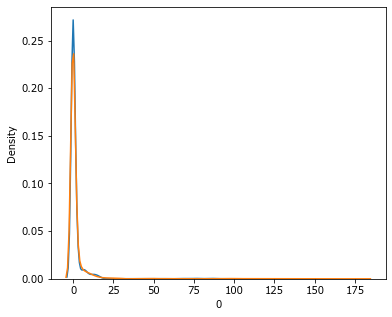

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
sns.kdeplot(scaled_df.iloc[:, 0], ax=ax)


sns.kdeplot(scaled_df.iloc[:, 1], ax=ax)

plt.show()

In [ ]:
print("TVol mean: ", dataset['Total Volume'].mean()," - TVol std: ", dataset['Total Volume'].std())
print("TBg mean: ", dataset['Total Bags'].mean()," - TBg std: ", dataset['Total Bags'].std())
print("TVol mean: ", scaled_df.iloc[:, 0].mean()," - TVol std: ", scaled_df.iloc[:, 0].std())
print("TBg mean: ", scaled_df.iloc[:, 1].mean()," - TBg std: ", scaled_df.iloc[:, 1].std())

TVol mean:  850644.0130089332  - TVol std:  3453545.3553994815
TBg mean:  239639.20205983953  - TBg std:  986242.3992164129
TVol mean:  1.7073034207459115  - TVol std:  8.00508637549347
TBg mean:  1.8064065385447883  - TBg std:  8.970838543492818


# Part V) Training Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train,y_train)
print(regressor.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


# Part VI) Testing model

In [ ]:
regressor.predict(sc.transform([[109428.33, 6829.22, 2015, 8, 1, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]))

array([1.4824])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([1.7311, 1.0698, 1.3127, ..., 1.8667, 1.778 , 1.7283])

# Part VII) R-Square Validation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9065284913148663

# Part VIII) Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train,y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.41 %
Standard Deviation: 0.73 %


In [ ]:
dataset_1 = dataset.iloc[:, 2:]
need = dataset_1.columns

In [ ]:
dataset_1 = dataset.iloc[:, 2:]
pd.DataFrame(regressor.feature_importances_,
             index=need,
             columns = ['Feature_Importances']).sort_values(by=['Feature_Importances'],
                                                           ascending=False)

,Feature_Importances
organic,0.215701
conventional,0.163250
Total Bags,0.111978
Total Volume,0.082402
year,0.073875
...,...
Tampa,0.001469
Albany,0.001429
SouthCarolina,0.001162
GreatLakes,0.000964


# Part IX) Testing on another Model

## 1) KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_1 = KNeighborsRegressor(n_neighbors=2)
model_1.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_1
r2_score(y_test, y_pred_1)

0.8700595410366064

In [ ]:
accuracies = cross_val_score(estimator = model_1, X = X_train,y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.00 %
Standard Deviation: 0.93 %


## 2) XGBoost

In [ ]:
from xgboost import XGBRegressor
regressor_1 = XGBRegressor(n_estimators=1000, num_parallel_tree=5)
regressor_1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=5, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [ ]:
y_pred_2 = regressor_1.predict(X_test)
y_pred_2
r2_score(y_test, y_pred_2)

0.9146676168638215

In [ ]:
accuracies = cross_val_score(estimator = regressor_1, X = X_train,y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.57 %
Standard Deviation: 0.63 %


In [ ]:
dataset_1 = dataset.iloc[:, 2:]
pd.DataFrame(regressor_1.feature_importances_,
             index=need,
             columns = ['Feature_Importances']).sort_values(by=['Feature_Importances'],
                                                           ascending=False)

,Feature_Importances
conventional,0.472925
NewYork,0.041375
SanFrancisco,0.038749
Northeast,0.031248
HartfordSpringfield,0.030457
...,...
Orlando,0.001419
GreatLakes,0.001418
SouthCarolina,0.001340
Total Volume,0.001120


## 3) XGBoost Posible tunning

In [ ]:
from xgboost import XGBRegressor
regressor_2 = XGBRegressor(n_estimators=100, 
                           max_depth= 10, 
                           learning_rate= 0.3, 
                           num_parallel_tree=5, 
                           colsample_bytree=1, 
                           subsample= 0.6)
regressor_2.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=5, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
y_pred_3 = regressor_2.predict(X_test)
y_pred_3
r2_score(y_test, y_pred_3)

0.9246504601718

In [ ]:
accuracies = cross_val_score(estimator = regressor_2, X = X_train,y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.53 %
Standard Deviation: 0.49 %


In [ ]:
dataset_1 = dataset.iloc[:, 2:]
pd.DataFrame(regressor_2.feature_importances_,
             index=need,
             columns = ['Feature_Importances']).sort_values(by=['Feature_Importances'],
                                                           ascending=False)

,Feature_Importances
conventional,0.628063
HartfordSpringfield,0.029850
SanFrancisco,0.026404
NewYork,0.023172
Northeast,0.019210
...,...
Orlando,0.001584
Total Bags,0.001433
SouthCarolina,0.001298
Total Volume,0.000706


# Kết luận:

    Với model: XGBRegressor(n_estimators=100, 
                           max_depth= 10, 
                           learning_rate= 0.3, 
                           num_parallel_tree=5, 
                           colsample_bytree=1, 
                           subsample= 0.6)

Sẽ cho kết quả có R-square score (0.92) cao nhất và chỉ số MAE: 0.077, MSE: 0.012, RMSE: 0.277 thấp nhất trong các model

# Các yêu cầu chỉnh sửa tương tự như 2.2